<a href="https://colab.research.google.com/github/schsuch/Twitter_sentiment_EDA-/blob/main/sentiment_analysis_emotions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis

dataset source: https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("sentiment_tweets.csv")

In [ ]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [ ]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [ ]:
df1=df[['sentiment','emotion']]
df1

In [ ]:
df1.columns

Index(['sentiment', 'emotion'], dtype='object')

In [ ]:
df3=df1[df1['sentiment']=="positive"]
df3

In [ ]:
df3.head()

,sentiment,emotion
2,positive,joy
7,positive,joy
8,positive,joy
10,positive,optimism
11,positive,anticipation


In [ ]:
df4=df3['emotion']
df4

2                 joy
7                 joy
8                 joy
10           optimism
11       anticipation
             ...     
24960             joy
24963        optimism
24964             joy
24966             joy
24969             joy
Name: emotion, Length: 7366, dtype: object

In [ ]:
list_text=list(df1["sentiment"])
list_text

In [ ]:

list_text2=list(df1["emotion"])
list_text2


In [ ]:
list3 = df3.values.tolist()
print(list3)

In [ ]:
list_text3=list(df4)
list_text3

In [ ]:
from collections import Counter

count = Counter()
for text in list_text:
  count[text] += 1

# Find most common 10 words from the Pandas dataframe
common_words=count.most_common(20)
common_words

[('negative', 10556), ('positive', 7366), ('neutral', 7048)]

In [ ]:
df_common_wd= pd.DataFrame(common_words)
df_common_wd

,0,1
0,negative,10556
1,positive,7366
2,neutral,7048


In [ ]:
from collections import Counter

count = Counter()
for text in list_text2:
  count[text] += 1

# Find most common 10 words from the Pandas dataframe
common_words2=count.most_common(20)
common_words2

[('anger', 7520),
 ('joy', 6326),
 ('anticipation', 5171),
 ('disgust', 3000),
 ('sadness', 1328),
 ('optimism', 1225),
 ('fear', 366),
 ('surprise', 34)]

In [ ]:
df_common_wd2= pd.DataFrame(common_words2)
df_common_wd2

,0,1
0,anger,7520
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [ ]:
from collections import Counter

count = Counter()
for text in list_text3:
  count[text] += 1

# Find most common 10 words from the Pandas dataframe
common_words3=count.most_common(10)
common_words3

In [ ]:
df_common_wd3= pd.DataFrame(common_words3)
df_common_wd3

,0,1
0,joy,5075
1,anticipation,1182
2,optimism,793
3,anger,153
4,sadness,62
5,disgust,58
6,fear,33
7,surprise,10


In [ ]:
df_common_wd.info()

In [ ]:
df_common_wd2.info()

In [ ]:
df_common_wd3.info()

In [ ]:
df_common_wd= df_common_wd.rename(columns={0: 'word'})
df_common_wd= df_common_wd.rename(columns={1: 'count'})
df_common_wd.style.background_gradient(cmap='Blues')

,word,count
0,negative,10556
1,positive,7366
2,neutral,7048


In [ ]:
df_common_wd2= df_common_wd2.rename(columns={0: 'word'})
df_common_wd2= df_common_wd2.rename(columns={1: 'count'})
df_common_wd2.style.background_gradient(cmap='Blues')

,word,count
0,anger,7520
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [ ]:
df_common_wd3= df_common_wd3.rename(columns={0: 'word'})
df_common_wd3= df_common_wd3.rename(columns={1: 'count'})
df_common_wd3.style.background_gradient(cmap='Blues')

,word,count
0,joy,5075
1,anticipation,1182
2,optimism,793
3,anger,153
4,sadness,62
5,disgust,58
6,fear,33
7,surprise,10


In [ ]:
import plotly.express as px

fig = px.bar(df_common_wd, x="word", y="count")
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(df_common_wd2, x="word", y="count")
fig.show()

In [ ]:
fig2= px.treemap(df_common_wd, path=['word'], values='count')
fig2.show()

In [ ]:
fig2= px.treemap(df_common_wd2, path=['word'], values='count')
fig2.show()

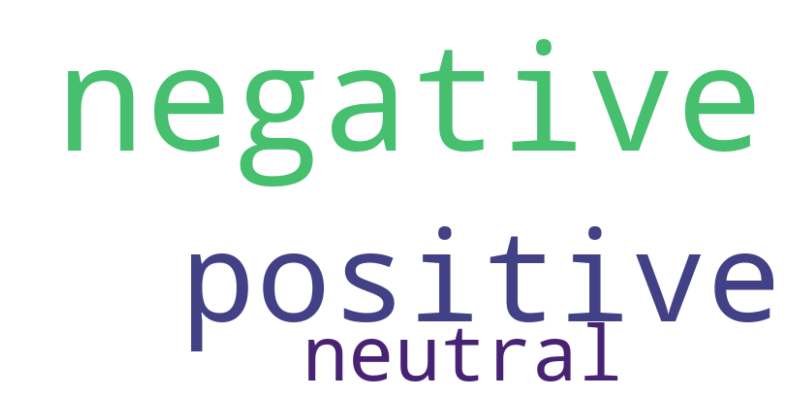

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict = dict(zip(df_common_wd['word'], df_common_wd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


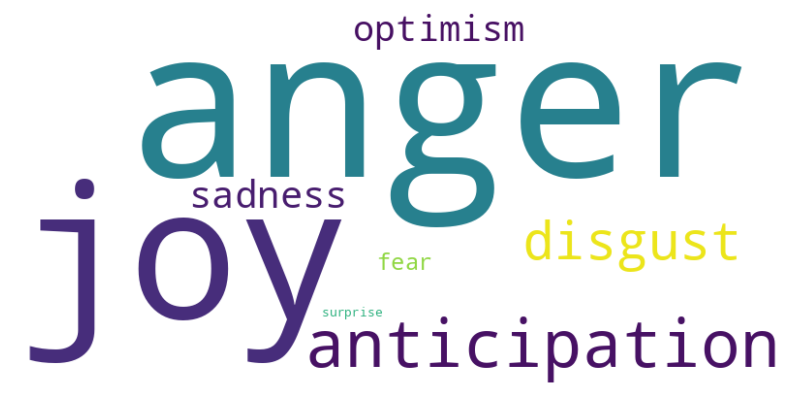

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict = dict(zip(df_common_wd2['word'], df_common_wd2['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()